In [298]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns 


# Reading Data

In [299]:
df = pd.read_csv (r'C:\Users\yesmi\OneDrive\Desktop\Data Analytics Projects\Projects Set 1\Cars Dataset.csv')

In [300]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [301]:
#Renaming the columns names for convinience
df.rename(columns={"Make": "Manufacturer",}, inplace=True)

In [302]:
df.shape

(432, 15)

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  428 non-null    object 
 1   Model         428 non-null    object 
 2   Type          428 non-null    object 
 3   Origin        428 non-null    object 
 4   DriveTrain    428 non-null    object 
 5   MSRP          428 non-null    object 
 6   Invoice       428 non-null    object 
 7   EngineSize    428 non-null    float64
 8   Cylinders     426 non-null    float64
 9   Horsepower    428 non-null    float64
 10  MPG_City      428 non-null    float64
 11  MPG_Highway   428 non-null    float64
 12  Weight        428 non-null    float64
 13  Wheelbase     428 non-null    float64
 14  Length        428 non-null    float64
dtypes: float64(8), object(7)
memory usage: 50.8+ KB


In [304]:
df.Origin.value_counts()

Asia      158
USA       147
Europe    123
Name: Origin, dtype: int64

In [305]:
df.Manufacturer.value_counts()

Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Honda            17
Nissan           17
Volkswagen       15
Chrysler         15
Dodge            13
Mitsubishi       13
Volvo            12
Jaguar           12
Hyundai          12
Subaru           11
Pontiac          11
Mazda            11
Lexus            11
Kia              11
Buick             9
Mercury           9
Lincoln           9
Saturn            8
Cadillac          8
Suzuki            8
Infiniti          8
GMC               8
Acura             7
Porsche           7
Saab              7
Land Rover        3
Oldsmobile        3
Jeep              3
Scion             2
Isuzu             2
MINI              2
Hummer            1
Name: Manufacturer, dtype: int64

In [306]:
df.Type.value_counts()

Sedan     262
SUV        60
Sports     49
Wagon      30
Truck      24
Hybrid      3
Name: Type, dtype: int64

In [307]:
df.DriveTrain.value_counts()

Front    226
Rear     110
All       92
Name: DriveTrain, dtype: int64

In [308]:
print("The types of cars are:",df.Type.unique())

The types of cars are: ['SUV' 'Sedan' 'Sports' 'Wagon' nan 'Truck' 'Hybrid']


In [309]:
#cars where Type is SUV

df[df.Type.isin(['SUV'])].head()

,Manufacturer,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
26,BMW,X3 3.0i,SUV,Europe,All,"$37,000","$33,873",3.0,6.0,225.0,16.0,23.0,4023.0,110.0,180.0
27,BMW,X5 4.4i,SUV,Europe,All,"$52,195","$47,720",4.4,8.0,325.0,16.0,22.0,4824.0,111.0,184.0
48,Buick,Rainier,SUV,USA,All,"$37,895","$34,357",4.2,6.0,275.0,15.0,21.0,4600.0,113.0,193.0
49,Buick,Rendezvous CX,SUV,USA,Front,"$26,545","$24,085",3.4,6.0,185.0,19.0,26.0,4024.0,112.0,187.0


# Data Cleaning 

In [310]:
df.dtypes

Manufacturer     object
Model            object
Type             object
Origin           object
DriveTrain       object
MSRP             object
Invoice          object
EngineSize      float64
Cylinders       float64
Horsepower      float64
MPG_City        float64
MPG_Highway     float64
Weight          float64
Wheelbase       float64
Length          float64
dtype: object

In [311]:
#Checking if there are missing variables
df.isnull().sum()

Manufacturer    4
Model           4
Type            4
Origin          4
DriveTrain      4
MSRP            4
Invoice         4
EngineSize      4
Cylinders       6
Horsepower      4
MPG_City        4
MPG_Highway     4
Weight          4
Wheelbase       4
Length          4
dtype: int64

## MSRP and Invoice
The columns MSRP and Invoice are a list of objects. However, since they are prices, we want them to be floats instead. 
To do that, we simply remove the Dollar $ sign and commas.

In [312]:
df.MSRP= df.MSRP.replace("[$,]", "", regex=True).astype(float)

In [313]:
df.Invoice= df.Invoice.replace("[$,]", "", regex=True).astype(float)

In [314]:
df.dtypes

Manufacturer     object
Model            object
Type             object
Origin           object
DriveTrain       object
MSRP            float64
Invoice         float64
EngineSize      float64
Cylinders       float64
Horsepower      float64
MPG_City        float64
MPG_Highway     float64
Weight          float64
Wheelbase       float64
Length          float64
dtype: object

## Cleaning Missing Data

In [315]:
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col].fillna(df[col].mean(),inplace=True)

In [316]:
df.isnull().sum()

Manufacturer    4
Model           4
Type            4
Origin          4
DriveTrain      4
MSRP            0
Invoice         0
EngineSize      0
Cylinders       0
Horsepower      0
MPG_City        0
MPG_Highway     0
Weight          0
Wheelbase       0
Length          0
dtype: int64

In [317]:
# drop rows containing NaN values 
df.dropna(inplace=True)

In [318]:
df.isnull().sum()

Manufacturer    0
Model           0
Type            0
Origin          0
DriveTrain      0
MSRP            0
Invoice         0
EngineSize      0
Cylinders       0
Horsepower      0
MPG_City        0
MPG_Highway     0
Weight          0
Wheelbase       0
Length          0
dtype: int64

In [319]:
df.head()

,Manufacturer,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


# Analysis

<AxesSubplot:>

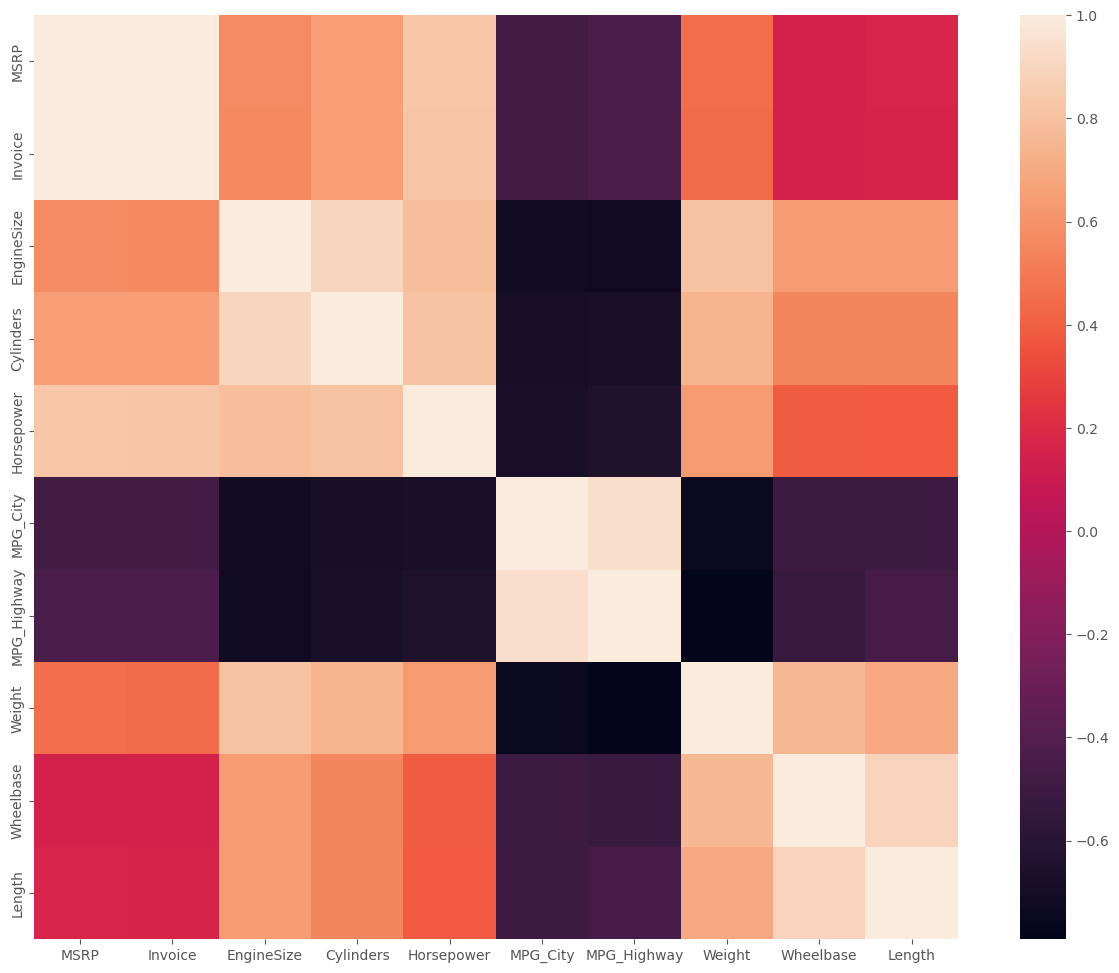

In [320]:
# Correlation matrix
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df.corr(), square=True, vmax = 1)

In [321]:
df.corr()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
MSRP,1.000000,0.999132,0.571753,0.649578,0.826945,-0.475020,-0.439622,0.448426,0.152000,0.172037
Invoice,0.999132,1.000000,0.564498,0.645075,0.823746,-0.470442,-0.434585,0.442332,0.148328,0.166586
EngineSize,0.571753,0.564498,1.000000,0.901727,0.787435,-0.709471,-0.717302,0.807867,0.636517,0.637448
Cylinders,0.649578,0.645075,0.901727,1.000000,0.810185,-0.684152,-0.675823,0.741334,0.546644,0.546826
Horsepower,0.826945,0.823746,0.787435,0.810185,1.000000,-0.676699,-0.647195,0.630796,0.387398,0.381554
MPG_City,-0.475020,-0.470442,-0.709471,-0.684152,-0.676699,1.000000,0.941021,-0.737966,-0.507284,-0.501526
MPG_Highway,-0.439622,-0.434585,-0.717302,-0.675823,-0.647195,0.941021,1.000000,-0.790989,-0.524661,-0.466092
Weight,0.448426,0.442332,0.807867,0.741334,0.630796,-0.737966,-0.790989,1.000000,0.760703,0.690021
Wheelbase,0.152000,0.148328,0.636517,0.546644,0.387398,-0.507284,-0.524661,0.760703,1.000000,0.889195
Length,0.172037,0.166586,0.637448,0.546826,0.381554,-0.501526,-0.466092,0.690021,0.889195,1.000000


In [322]:
correlation_mat=df.corr()
correlation_pairs = correlation_mat.unstack()

matplotlib.rcParams['figure.figsize'] = (12,8) 
sorted_pairs = correlation_pairs.sort_values(kind="quicksort")

We can see that features with the highest correlations (correlation above 70%) are:

In [323]:
#Check highest correlation
strong_pairs = sorted_pairs[(sorted_pairs) > 0.7]
print(strong_pairs)

Weight       Cylinders      0.741334
Cylinders    Weight         0.741334
Weight       Wheelbase      0.760703
Wheelbase    Weight         0.760703
Horsepower   EngineSize     0.787435
EngineSize   Horsepower     0.787435
             Weight         0.807867
Weight       EngineSize     0.807867
Cylinders    Horsepower     0.810185
Horsepower   Cylinders      0.810185
Invoice      Horsepower     0.823746
Horsepower   Invoice        0.823746
MSRP         Horsepower     0.826945
Horsepower   MSRP           0.826945
Wheelbase    Length         0.889195
Length       Wheelbase      0.889195
EngineSize   Cylinders      0.901727
Cylinders    EngineSize     0.901727
MPG_City     MPG_Highway    0.941021
MPG_Highway  MPG_City       0.941021
MSRP         Invoice        0.999132
Invoice      MSRP           0.999132
MSRP         MSRP           1.000000
Weight       Weight         1.000000
MPG_Highway  MPG_Highway    1.000000
MPG_City     MPG_City       1.000000
Horsepower   Horsepower     1.000000
C

In [324]:
df.head()

,Manufacturer,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [325]:
df_num = df
for col_name in df_num.columns:
    if (df_num[col_name].dtype=='object'):
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes

df_num.head()

,Manufacturer,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,0,229,1,0,0,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,0,293,2,0,1,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,0,366,2,0,1,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,0,365,2,0,1,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,0,0,2,0,1,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


<AxesSubplot:>

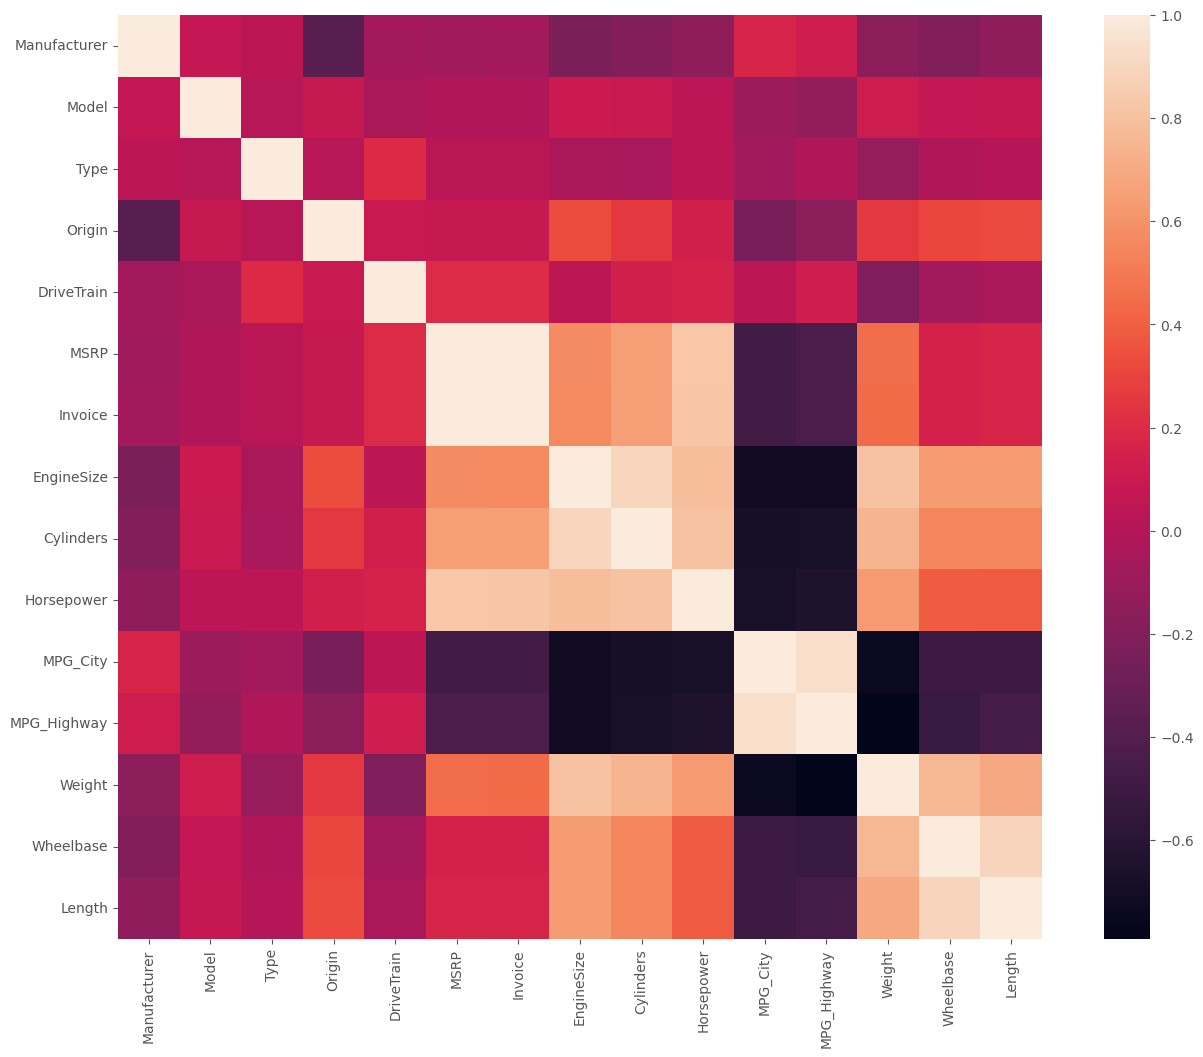

In [326]:
# Correlation matrix
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df.corr(), square=True, vmax = 1)

In [327]:
correlation_mat=df_num.corr()
correlation_pairs = correlation_mat.unstack()
sorted_pairs = correlation_pairs.sort_values(kind="quicksort")
strong_pairs = sorted_pairs[(sorted_pairs) > 0.8]
print(strong_pairs)

Weight        EngineSize      0.807867
EngineSize    Weight          0.807867
Cylinders     Horsepower      0.810185
Horsepower    Cylinders       0.810185
              Invoice         0.823746
Invoice       Horsepower      0.823746
Horsepower    MSRP            0.826945
MSRP          Horsepower      0.826945
Length        Wheelbase       0.889195
Wheelbase     Length          0.889195
Cylinders     EngineSize      0.901727
EngineSize    Cylinders       0.901727
MPG_City      MPG_Highway     0.941021
MPG_Highway   MPG_City        0.941021
Invoice       MSRP            0.999132
MSRP          Invoice         0.999132
Manufacturer  Manufacturer    1.000000
EngineSize    EngineSize      1.000000
Weight        Weight          1.000000
MPG_Highway   MPG_Highway     1.000000
MPG_City      MPG_City        1.000000
Horsepower    Horsepower      1.000000
Cylinders     Cylinders       1.000000
Invoice       Invoice         1.000000
MSRP          MSRP            1.000000
DriveTrain    DriveTrain 

We can see that the highest correlation is between MSRP and the invoice (as expected). There is also a high correlation between MSRP and Horsepower (0.826945).